# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [2]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [28]:
#code here

import pandas as pd

# Count occurrences of each type
type1_counts = df["Type 1"].value_counts()
type2_counts = df["Type 2"].value_counts()

# Combine into a DataFrame (just for reference, not needed for mean HP)
combined_counts = pd.DataFrame({"Type 1": type1_counts, "Type 2": type2_counts})

# Melt the DataFrame to combine Type 1 and Type 2 into a single column
df_melted = df.melt(id_vars=["HP"], value_vars=["Type 1", "Type 2"], var_name="Type Column", value_name="Type")

# Drop NaN values (some Pokémon might not have a "Type 2")
df_melted = df_melted.dropna()

# Compute mean HP for each type
combined_counts = df_melted.groupby("Type")["HP"].mean()

print(combined_counts)




Type
Bug         56.736111
Dark        70.235294
Dragon      82.900000
Electric    63.200000
Fairy       68.475000
Fighting    74.566038
Fire        70.156250
Flying      71.366337
Ghost       62.826087
Grass       66.052632
Ground      75.582090
Ice         78.631579
Normal      76.735294
Poison      62.596774
Psychic     71.211111
Rock        66.017241
Steel       64.959184
Water       71.023810
Name: HP, dtype: float64


In [27]:
df_combined = pd.concat([df["Type 1"], df["Type 2"]])  # Combine both columns into one
type_counts = df_combined.value_counts()  # Count occurrences of each type
print(type_counts)


Water       126
Normal      102
Flying      101
Grass        95
Psychic      90
Bug          72
Ground       67
Fire         64
Poison       62
Rock         58
Fighting     53
Dark         51
Electric     50
Dragon       50
Steel        49
Ghost        46
Fairy        40
Ice          38
Name: count, dtype: int64


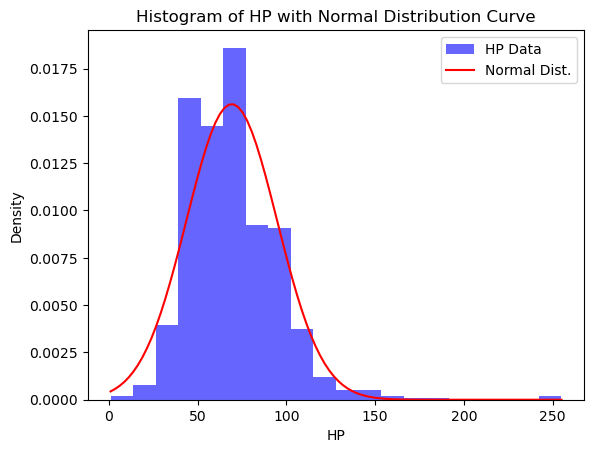

KS Test Statistic: 0.0958
P-Value: 0.0000
Reject H0: HP does NOT follow a normal distribution.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram with normal curve
plt.hist(df["HP"], bins=20, density=True, alpha=0.6, color='b', label="HP Data")

# Overlay normal distribution curve
mu, sigma = df["HP"].mean(), df["HP"].std()
x = np.linspace(df["HP"].min(), df["HP"].max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Normal Dist.")

# Labels
plt.xlabel("HP")
plt.ylabel("Density")
plt.title("Histogram of HP with Normal Distribution Curve")
plt.legend()
plt.show()

# Perform KS test
ks_stat, p_value = stats.kstest(df["HP"], 'norm', args=(mu, sigma))

print(f"KS Test Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject H0: HP follows a normal distribution.")
else:
    print("Reject H0: HP does NOT follow a normal distribution.")


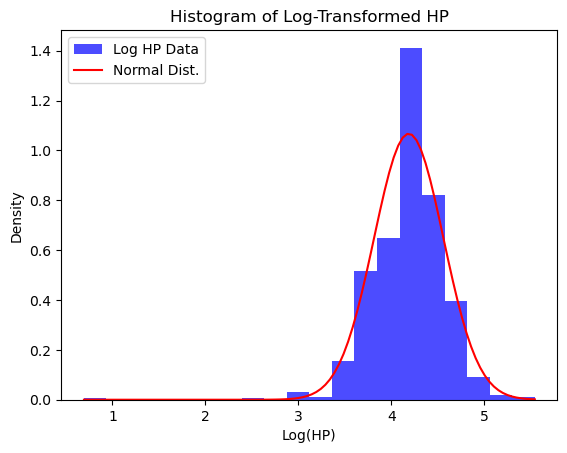

KS Test Statistic: 0.0782
P-Value: 0.0001
Reject H0: HP does NOT follow a normal distribution.


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
df["Log_HP"] = np.log(df["HP"] + 1)

# Plot histogram of log-transformed HP
plt.hist(df["Log_HP"], bins=20, color='b', alpha=0.7, density=True, label="Log HP Data")

# Overlay normal distribution curve
mu, sigma = df["Log_HP"].mean(), df["Log_HP"].std()
x = np.linspace(df["Log_HP"].min(), df["Log_HP"].max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Normal Dist.")

# Labels
plt.xlabel("Log(HP)")
plt.ylabel("Density")
plt.title("Histogram of Log-Transformed HP")
plt.legend()
plt.show()

# Perform KS test
ks_stat, p_value = stats.kstest(df["Log_HP"], 'norm', args=(mu, sigma))

print(f"KS Test Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("Fail to reject H0: HP follows a normal distribution.")
else:
    print("Reject H0: HP does NOT follow a normal distribution.")


In [30]:
top_10_hp = df.nlargest(10, "HP")  # Get top 10 Pokémon sorted by HP
print(top_10_hp)


                       Name   Type 1  Type 2   HP  Attack  Defense  Sp. Atk  \
261                 Blissey   Normal     NaN  255      10       10       75   
121                 Chansey   Normal     NaN  250       5        5       35   
217               Wobbuffet  Psychic     NaN  190      33       58       33   
351                 Wailord    Water     NaN  170      90       45       90   
655               Alomomola    Water     NaN  165      75       80       40   
155                 Snorlax   Normal     NaN  160     110       65       65   
313                 Slaking   Normal     NaN  150     160      100       95   
473                Drifblim    Ghost  Flying  150      80       44       90   
544  Giratina Altered Forme    Ghost  Dragon  150     100      120      100   
545   Giratina Origin Forme    Ghost  Dragon  150     120      100      120   

     Sp. Def  Speed  Generation  Legendary  
261      135     55           2      False  
121      105     50           1      Fal

In [34]:
from scipy.stats import mannwhitneyu

# Select Pokémon that are Dragon-type (either in Type 1 or Type 2)
hp_dragon = df[(df["Type 1"] == "Dragon") | (df["Type 2"] == "Dragon")]["HP"]

# Select Pokémon that are Grass-type (either in Type 1 or Type 2)
hp_grass = df[(df["Type 1"] == "Grass") | (df["Type 2"] == "Grass")]["HP"]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(hp_dragon, hp_grass, alternative="two-sided")

print(f"Mann-Whitney U Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in HP between Dragon and Grass types.")
else:
    print("No significant difference in HP between Dragon and Grass types.")


Mann-Whitney U Statistic: 3347.0000
P-Value: 0.0001
Significant difference in HP between Dragon and Grass types.


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [37]:
import scipy.stats as stats
import pandas as pd

# Define Legendary and Non-Legendary groups
legendary = df[df["Legendary"] == True]
non_legendary = df[df["Legendary"] == False]

# List of stats to compare
stats_columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# Perform tests
results = []

for col in stats_columns:
    # Normality test (Kolmogorov-Smirnov)
    _, p_norm_legendary = stats.kstest(legendary[col], 'norm', args=(legendary[col].mean(), legendary[col].std()))
    _, p_norm_non_legendary = stats.kstest(non_legendary[col], 'norm', args=(non_legendary[col].mean(), non_legendary[col].std()))

    # Variance test (Levene’s Test)
    _, p_var = stats.levene(legendary[col], non_legendary[col])

    # Choose test based on normality
    if p_norm_legendary > 0.05 and p_norm_non_legendary > 0.05:
        # Normal distribution -> Use T-test
        if p_var > 0.05:
            stat, p_value = stats.ttest_ind(legendary[col], non_legendary[col], equal_var=True)  # Standard T-test
        else:
            stat, p_value = stats.ttest_ind(legendary[col], non_legendary[col], equal_var=False)  # Welch’s T-test
        test_used = "T-test"
    else:
        # Non-normal distribution -> Use Mann-Whitney U Test
        stat, p_value = stats.mannwhitneyu(legendary[col], non_legendary[col], alternative="two-sided")
        test_used = "Mann-Whitney U"

    # Store results
    results.append([col, test_used, stat, p_value])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Stat", "Test Used", "Statistic", "P-Value"])
print(results_df)

# Interpretation
alpha = 0.05
for index, row in results_df.iterrows():
    if row["P-Value"] < alpha:
        print(f"⚠️ {row['Stat']} is significantly different between Legendary and Non-Legendary Pokémon (p = {row['P-Value']:.4f})")
    else:
        print(f"✅ No significant difference in {row['Stat']} (p = {row['P-Value']:.4f})")


      Stat       Test Used  Statistic       P-Value
0       HP  Mann-Whitney U    38778.0  6.931108e-17
1   Attack  Mann-Whitney U    39868.0  3.462567e-19
2  Defense  Mann-Whitney U    37418.5  3.390883e-14
3  Sp. Atk  Mann-Whitney U    42680.0  6.287374e-26
4  Sp. Def  Mann-Whitney U    40496.5  1.296661e-20
5    Speed  Mann-Whitney U    39697.5  8.147513e-19
⚠️ HP is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)
⚠️ Attack is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)
⚠️ Defense is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)
⚠️ Sp. Atk is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)
⚠️ Sp. Def is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)
⚠️ Speed is significantly different between Legendary and Non-Legendary Pokémon (p = 0.0000)


In [45]:
from tabulate import tabulate

# Convert DataFrames to formatted tables
legendary_table = tabulate(legendary.describe(), headers="keys", tablefmt="fancy_grid")
non_legendary_table = tabulate(non_legendary.describe(), headers="keys", tablefmt="fancy_grid")

# Print the results
print("📊 Descriptive Statistics for Legendary Pokémon:\n")
print(legendary_table)

print("\n📊 Descriptive Statistics for Non-Legendary Pokémon:\n")
print(non_legendary_table)

# 


📊 Descriptive Statistics for Legendary Pokémon:

╒═══════╤══════════╤══════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════════╤═══════════╕
│       │       HP │   Attack │   Defense │   Sp. Atk │   Sp. Def │    Speed │   Generation │    Log_HP │
╞═══════╪══════════╪══════════╪═══════════╪═══════════╪═══════════╪══════════╪══════════════╪═══════════╡
│ count │  65      │   65     │   65      │   65      │    65     │  65      │     65       │ 65        │
├───────┼──────────┼──────────┼───────────┼───────────┼───────────┼──────────┼──────────────┼───────────┤
│ mean  │  92.7385 │  116.677 │   99.6615 │  122.185  │   105.938 │ 100.185  │      3.76923 │  4.51197  │
├───────┼──────────┼──────────┼───────────┼───────────┼───────────┼──────────┼──────────────┼───────────┤
│ std   │  21.7222 │   30.348 │   28.2551 │   31.1046 │    28.827 │  22.9523 │      1.45526 │  0.247722 │
├───────┼──────────┼──────────┼───────────┼───────────┼───────────┼──────────┼──────────────┼──────────

In [18]:
#code here

# Just looking at the mean I can see that on evert characterictic legendary exceed the non-legendary Pokemon.
# with 65 pokemon in L and 735 in N_L I have enought statistical power to makes does differences statically  significant

# Legendary Pokémon:
# mean  │  92.7385 │  116.677 │   99.6615 │  122.185  │   105.938 │ 100.185 |

# Non-Legendary Pokémon:
# mean  │  67.1823 │  75.6694 │   71.5592 │   68.4544 │   68.8925 │  65.4558 |

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

📊 Shapiro-Wilk Normality Test:
Close to School/Hospital: p = 0.0000
Far from School/Hospital: p = 0.0000

📊 Two-Sample T-Test Results:
Statistic: 37.99
P-Value: 0.0000
✅ Houses close to a school or hospital are significantly more expensive (p < 0.05).


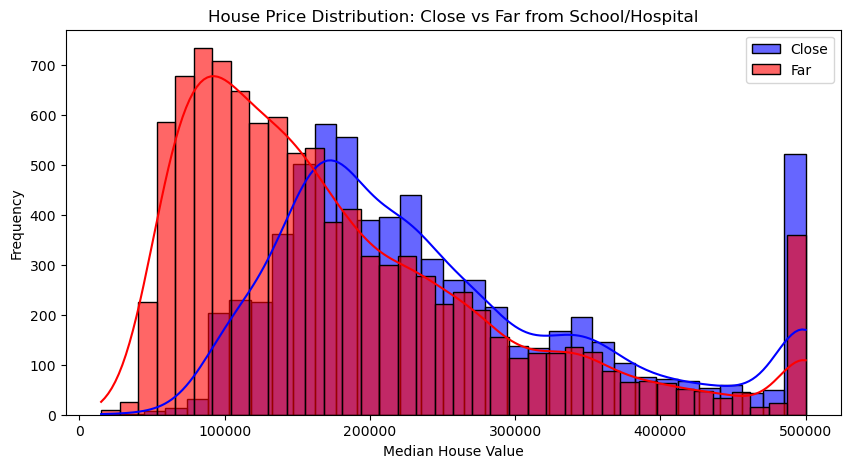

In [48]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Define school and hospital coordinates
school_coords = np.array([-118, 34])
hospital_coords = np.array([-122, 37])

# Function to calculate Euclidean distance
def euclidean_distance(lat, lon, ref_point):
    return np.sqrt((lat - ref_point[1])**2 + (lon - ref_point[0])**2)

# Compute distances
df['Distance_to_School'] = df.apply(lambda row: euclidean_distance(row['latitude'], row['longitude'], school_coords), axis=1)
df['Distance_to_Hospital'] = df.apply(lambda row: euclidean_distance(row['latitude'], row['longitude'], hospital_coords), axis=1)

# Correct classification: Close to either a school OR a hospital
df['Close_to_School_or_Hospital'] = (df['Distance_to_School'] < 0.50) | (df['Distance_to_Hospital'] < 0.50)

# Split data into two groups
close_houses = df[df['Close_to_School_or_Hospital']]['median_house_value']
far_houses = df[~df['Close_to_School_or_Hospital']]['median_house_value']

# Check for normality using Shapiro-Wilk test
shapiro_close = shapiro(close_houses.sample(500, random_state=42)) if len(close_houses) > 500 else shapiro(close_houses)
shapiro_far = shapiro(far_houses.sample(500, random_state=42)) if len(far_houses) > 500 else shapiro(far_houses)

print(f"📊 Shapiro-Wilk Normality Test:")
print(f"Close to School/Hospital: p = {shapiro_close.pvalue:.4f}")
print(f"Far from School/Hospital: p = {shapiro_far.pvalue:.4f}")

# Perform two-sample t-test
stat, p_value = ttest_ind(close_houses, far_houses, equal_var=False)  # Welch’s t-test

# Print results
print(f"\n📊 Two-Sample T-Test Results:")
print(f"Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Houses close to a school or hospital are significantly more expensive (p < 0.05).")
else:
    print("❌ No significant difference in house prices (p >= 0.05).")

# Visualization: Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(close_houses, color="blue", label="Close", kde=True, alpha=0.6)
sns.histplot(far_houses, color="red", label="Far", kde=True, alpha=0.6)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("House Price Distribution: Close vs Far from School/Hospital")
plt.legend()
plt.show()
